In [69]:
# All imports
import numpy as np
import matplotlib.pyplot as plt

In [95]:
start_price = 100
# Percentage volatility or annualized volatility
vola = 0.1997 # 0.1997 Nasdaq 100 or 0.17608 or S&P 500
# Overall trend or average return per year + inflation!
year_return = 0.1562 # Nasdaq 100 last 17 years
inflation = 0.033 # US data 1914-2024

# All calculation below are inflation adjusted (but inflation constant!)
year_return = year_return - inflation

# Total number of simulations
n_simul = 10000
# Assumption 252 trading days
delta = 1.0 / 252.0
# Simulation years
sim_years = 10
# Stockdays per year
trad_days_per_year = 252
# Runtime in days
runtime = trad_days_per_year * sim_years - 1

# Withdrawal rate is yearly and after the first year!
yearly_withdrawels = True
withdraw_after_year = True


# Money is taken out of the account after one year
withdrawel_rate = 0.04

In [96]:
def brownian_motion(delta, vola, runtime, n_simul):
    # standard deviation or scale is sqrt of volatiliy for brownian motion
    return vola * np.random.normal(loc=0, scale=np.sqrt(delta),
                                   size=(runtime, n_simul))

In [97]:
# Random geometric motion returns
def rgm_returns(delta, vola, runtime, year_return, n_simul):
    motion = brownian_motion(delta, vola, runtime, n_simul)
    return np.exp(motion + (year_return - vola ** 2 / 2) * delta)

In [98]:
def rgm_stock_movements(start_price, delta, vola, 
                        runtime, year_return, n_simul):
    returns = rgm_returns(delta, vola, runtime, year_return, n_simul)
    stacked = np.vstack([np.ones(n_simul), returns]) # prepends 1 infront of all returns
    return start_price * stacked.cumprod(axis=0)

In [99]:
stock_prices = rgm_stock_movements(start_price, delta, 
                                   vola, runtime, year_return, 
                                   n_simul)

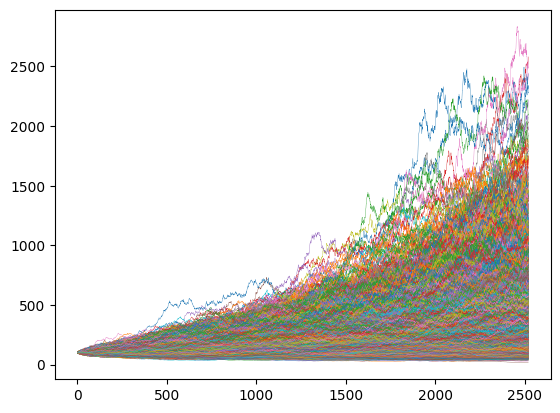

In [100]:
plt.plot(stock_prices, linewidth=0.25)
plt.show()

In [104]:
np.average(stock_prices[-1, :])

345.3992505898704

In [53]:
def withdrawels_per_year(withdrawel_rate, start_price):
    return withdrawel_rate * start_price
    
    
def total_withdrawels(withdrawel_rate, start_price, years_till_bust):
    return withdrawels_per_year(withdrawel_rate, start_price) * years_till_bust
    

In [66]:
def rgm_stock_mov_plus_withdrawal(start_price, delta, vola, 
                                  runtime, year_return, n_simul,
                                  withdrawel_rate):
    daily_returns = rgm_returns(delta, vola, runtime, year_return, n_simul)
    
    # prepends 1 infront of all daily_returns
    daily_returns = np.vstack([np.ones(n_simul), daily_returns])
    running_returns = daily_returns.cumprod(axis=0)

    index_arr = np.arange(1, runtime+2)
    withdrawal_returns = np.where(index_arr % trad_days_per_year == 0, -withdrawel_rate, 0)
    
    # Same for all simulations
    withdrawal_returns = np.expand_dims(withdrawal_returns, axis=1)
    withdrawal_returns = np.repeat(withdrawal_returns, axis=1, repeats=n_simul)

    tot_returns = running_returns + withdrawal_returns
    
    print(tot_returns)
    return start_price * tot_returns

In [67]:

stock_prices = rgm_stock_mov_plus_withdrawal(start_price, delta, 
                                            vola, runtime, year_return, 
                                            n_simul=4, withdrawel_rate=0.16)

[[1.         1.         1.         1.        ]
 [1.00860025 0.99099341 1.01184058 1.00423784]
 [1.04344309 1.01463788 1.00258823 1.00711629]
 ...
 [4.00503481 2.3950358  1.76986821 6.18389375]
 [3.95705789 2.35032118 1.79110914 6.19359631]
 [3.91127267 2.36334102 1.81171105 6.19819077]]
[[1.         1.         1.         1.        ]
 [1.00860025 0.99099341 1.01184058 1.00423784]
 [1.04344309 1.01463788 1.00258823 1.00711629]
 ...
 [4.00503481 2.3950358  1.76986821 6.18389375]
 [3.95705789 2.35032118 1.79110914 6.19359631]
 [3.75127267 2.20334102 1.65171105 6.03819077]]


In [64]:
stock_prices[245:254, 3]

array([139990.49083059, 139029.85245862, 137396.93353554, 135634.7706852 ,
       133240.0693993 , 134102.57819385, 118514.06041998, 136140.06640676,
       133384.07288456])

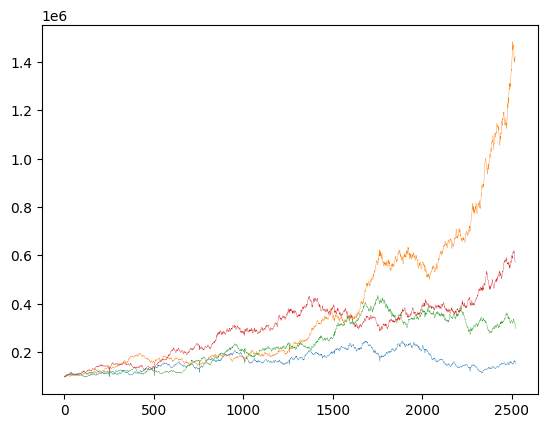

In [65]:
plt.plot(stock_prices, linewidth=0.25)
plt.show()

In [58]:
index_arr = np.arange(1, runtime+2)
withdrawal_returns = np.where(index_arr % trad_days_per_year == 0, -withdrawel_rate, 0)
    
# Same for all simulations
withdrawal_returns = np.expand_dims(withdrawal_returns, axis=1)
withdrawal_returns = np.repeat(withdrawal_returns, axis=1, repeats=n_simul)

In [59]:
withdrawal_returns

array([[ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.04, -0.04, -0.04, ..., -0.04, -0.04, -0.04]])

In [60]:
# Notes David:
# Withdrawal should not be a percentage of current wealth, but percentage of initial wealth + inflation!
# In this scenario, Inflation is fixed!
# Next step, when zero, make total return equal to 0 for period after!
# Calculate total withdrawals made during the time!
# Start working on dinamic plot
# Implementation only allows for yearly withdrawals and only a withdrawal after the first year!